In [1]:
import pandas as pd
# import_source="https://raw.githubusercontent.com/tlaphane/Machine-Learning---Twitter-User-Gender-Classification/master/gender-classifier-DFE-791531.csv"
df = pd.read_csv('gender-classifier-DFE-791531.csv',encoding='latin1')
print("data is loaded")

data is loaded


In [2]:
import numpy as np 
df.head(10) ##or dataframe.tail(n) for the last rows of the dataset

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0000,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)
6,815719232,False,finalized,3,10/27/15 1:57,brand,1.0000,yes,1.0,4/24/08 13:03,...,https://pbs.twimg.com/profile_images/528547133...,0,0,@BpackEngineer Thank you for your patience whi...,NaN,13354,10/26/15 12:40,6.587300e+17,Worldwide,Eastern Time (US & Canada)
7,815719233,False,finalized,3,10/26/15 23:48,male,1.0000,yes,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.587300e+17,NaN,NaN
8,815719234,False,finalized,3,10/27/15 1:52,female,1.0000,yes,1.0,9/8/15 4:50,...,https://pbs.twimg.com/profile_images/658670112...,0,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,NaN,482,10/26/15 12:40,6.587300e+17,NaN,NaN
9,815719235,False,finalized,3,10/27/15 1:49,female,1.0000,yes,1.0,5/13/11 3:32,...,https://pbs.twimg.com/profile_images/513327289...,0,FFFFFF,@Evielady just how lovely is the tree this yea...,NaN,26085,10/26/15 12:40,6.587300e+17,"Nottingham, England.",Amsterdam


# Checking if there are missing values
True means the number of values that are present

False means the number of values that are missing

In [3]:
for column in df.notnull().columns.values.tolist():
    print (df.notnull()[column].value_counts().to_frame())
    print("\n")  

      _unit_id
True     20050


      _golden
True    20050


      _unit_state
True        20050


      _trusted_judgments
True               20050


       _last_judgment_at
True               20000
False                 50


       gender
True    19953
False      97


       gender:confidence
True               20024
False                 26


      profile_yn
True       20050


      profile_yn:confidence
True                  20050


      created
True    20050


       description
True         16306
False         3744


      fav_number
True       20050


       gender_gold
False        20000
True            50


      link_color
True       20050


       name
True  20050


       profile_yn_gold
False            20000
True                50


      profileimage
True         20050


      retweet_count
True          20050


      sidebar_color
True          20050


       text
True  20050


       tweet_coord
False        19891
True           159


      tweet_count
True        



# Replacing missing values with most frequent value on that feature


### The following are the identified features with missing values:
* _last_judgment_at
* gender
* gender:confidence
* description
* gender_gold
* profile_yn_gold
* tweet_coord
* tweet_location
* user_timezone

In [4]:
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [5]:
#replacing missing gender value with most frequent gender
df['gender'].replace(np.NaN, "female",inplace=True)
df['gender'].value_counts()

female     6797
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [6]:
#replacing unknown gender value with most frequent gender
df['gender'].replace("unknown", "female",inplace=True)
df['gender'].value_counts()

female    7914
male      6194
brand     5942
Name: gender, dtype: int64

In [7]:
df['gender:confidence'].value_counts()

1.0000    13926
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence, Length: 923, dtype: int64

In [8]:
#replacing missing gender:confidence value with most frequent gender:confidence
df['gender:confidence'].replace(np.NaN, 1.0000,inplace=True)
df['gender:confidence'].value_counts()

1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence, Length: 923, dtype: int64

In [9]:
df['description'].value_counts()

You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV                33
Subscribe to her Inspirational channel here http://t.co/P1y6f2Rzoj ~~~~~~~~~~~~~~\nFor promoting on this page email, business_inquiry@outlook.com                       32
secret little rendezvous                                                                                                                                                27
The Map Game is a free geography quiz based on Google Maps. No flash, no need to register, just start finding places on a blind map!                                    24
'Cos even an old girl's best friend is still her MUM!                                                                                                                   18
                                                                                                                                                 

In [10]:
#replacing missing description value with most frequent description
df['description'].replace(np.NaN, "You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV",inplace=True)
df['description'].value_counts()

You can be spiritually empowered, financially secure, and improve your health all while doing so - our research proves it. Visit https://t.co/GrFOxFjwPV                3777
Subscribe to her Inspirational channel here http://t.co/P1y6f2Rzoj ~~~~~~~~~~~~~~\nFor promoting on this page email, business_inquiry@outlook.com                         32
secret little rendezvous                                                                                                                                                  27
The Map Game is a free geography quiz based on Google Maps. No flash, no need to register, just start finding places on a blind map!                                      24
'Cos even an old girl's best friend is still her MUM!                                                                                                                     18
                                                                                                                                       

In [11]:
df['gender_gold'].value_counts()

male               19
female             14
brand              13
unknown             2
male\nunknown       1
female\nunknown     1
Name: gender_gold, dtype: int64

In [12]:
df.loc[(df["gender_gold"] == "unknown")]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20024,815754614,True,golden,235,NaN,brand,0.5540,yes,1.0,3/24/09 20:52,...,https://pbs.twimg.com/profile_images/649004216...,0,0,The droids you're looking for... https://t.co/...,NaN,18857,10/26/15 12:39,6.587300e+17,New Zealand,Auckland
20042,815756642,True,golden,212,NaN,brand,0.6364,yes,1.0,6/8/14 19:07,...,https://pbs.twimg.com/profile_images/616770699...,0,948C75,Best Bloody Mary Brunch at the #NYCWFF @nyceff...,NaN,5900,10/26/15 12:40,6.587300e+17,"Miami, FL",Eastern Time (US & Canada)


In [13]:
# correction of gender_role from "unknown" to "brand" since profile is golden and gender is brand
df.loc[(df["gender_gold"] == "unknown")]
m = df["gender_gold"] == "unknown"
df.loc[m,'gender_gold'] = df.loc[m,'gender_gold'].astype(str).replace(r'unknown','brand',regex=True)
df["gender_gold"].value_counts()

male               19
brand              15
female             14
male\nunknown       1
female\nunknown     1
Name: gender_gold, dtype: int64

In [14]:
df[(df["gender_gold"] == "female\nunknown")]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20016,815753740,True,golden,228,NaN,female,0.765,yes,1.0,8/27/11 19:14,...,https://pbs.twimg.com/profile_images/657782196...,0,0,@iJamCrazyy aka I miss hoopin and womping in t...,NaN,26769,10/26/15 12:40,6.587300e+17,camp blueberry @ EF,Quito


In [15]:
# correction of gender_role from "female\nunknown" to "female" since profile is golden and gender is female
df.loc[(df["gender_gold"] == "female\nunknown")]
m = df["gender_gold"] == "female\nunknown"
df.loc[m,'gender_gold'] = df.loc[m,'gender_gold'].astype(str).replace(r'female\nunknown','female',regex=True)
df["gender_gold"].value_counts()

male             19
brand            15
female           15
male\nunknown     1
Name: gender_gold, dtype: int64

In [16]:
df[(df["gender_gold"] == "male\nunknown")]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
20023,815754554,True,golden,254,NaN,male,0.5762,yes,1.0,11/18/10 11:16,...,https://abs.twimg.com/sticky/default_profile_i...,0,C0DEED,George Bush and Dick Cheney need to vacation i...,NaN,5,10/26/15 12:40,6.587300e+17,NaN,NaN


In [17]:
# correction of gender_role from "male\nunknown" to "male" since profile is golden and gender is male
df.loc[(df["gender_gold"] == "male\nunknown")]
m = df["gender_gold"] == "male\nunknown"
df.loc[m,'gender_gold'] = df.loc[m,'gender_gold'].astype(str).replace(r'male\nunknown','male',regex=True)
df["gender_gold"].value_counts()

male      20
brand     15
female    15
Name: gender_gold, dtype: int64

In [18]:
df['profile_yn_gold'].value_counts()

yes    50
Name: profile_yn_gold, dtype: int64

In [19]:
#replacing "Nan" with "no" for profile that are not golden
df['profile_yn_gold'].replace(np.NaN, "no",inplace=True)
df['profile_yn_gold'].value_counts()

no     20000
yes       50
Name: profile_yn_gold, dtype: int64

In [20]:
df['tweet_location'].value_counts()

London               152
United States        142
USA                   94
UK                    92
Los Angeles, CA       69
                    ... 
221C Baker Street      1
Barstow                1
on fire                1
Ragin cajun            1
the haven              1
Name: tweet_location, Length: 7864, dtype: int64

In [21]:
#replacing missing tweet_location value with most frequent tweet_location
df['tweet_location'].replace(np.NaN, "London",inplace=True)
df['tweet_location'].value_counts()

London               7636
United States         142
USA                    94
UK                     92
Los Angeles, CA        69
                     ... 
221C Baker Street       1
Barstow                 1
on fire                 1
Ragin cajun             1
the haven               1
Name: tweet_location, Length: 7864, dtype: int64

In [22]:
df['user_timezone'].value_counts()

Eastern Time (US & Canada)        2496
Pacific Time (US & Canada)        2106
Central Time (US & Canada)        1505
London                            1307
Atlantic Time (Canada)             589
                                  ... 
IST                                  1
Australia/Brisbane                   1
America/Argentina/Buenos_Aires       1
GMT+3                                1
America/Boise                        1
Name: user_timezone, Length: 156, dtype: int64

In [23]:
#replacing missing user_timezone value with most frequent user_timezone
df['user_timezone'].replace(np.NaN, "Eastern Time (US & Canada)",inplace=True)
df['user_timezone'].value_counts()

Eastern Time (US & Canada)        10294
Pacific Time (US & Canada)         2106
Central Time (US & Canada)         1505
London                             1307
Atlantic Time (Canada)              589
                                  ...  
IST                                   1
Australia/Brisbane                    1
America/Argentina/Buenos_Aires        1
GMT+3                                 1
America/Boise                         1
Name: user_timezone, Length: 156, dtype: int64

In [24]:
df['tweet_coord'].value_counts()

[51.1133, -0.182914]            2
[30.764, 20.2236]               2
[18.5204, 73.8567]              2
[25.2803, 51.5225]              2
[33.46889822, -112.09379298]    2
                               ..
[-25.61299, 27.21107]           1
[53.3777525, -1.53192167]       1
[39.93997834, -75.16645509]     1
[43.0343437, -88.0074921]       1
[-20.25556582, 57.46272175]     1
Name: tweet_coord, Length: 146, dtype: int64

In [25]:
#replacing missing tweet_coord value with most frequent tweet_coord
df['tweet_coord'].replace(np.NaN, "[40.798598, -73.971836]",inplace=True)
df['tweet_coord'].value_counts()

[40.798598, -73.971836]         19893
[30.764, 20.2236]                   2
[18.5204, 73.8567]                  2
[25.2803, 51.5225]                  2
[33.46889822, -112.09379298]        2
                                ...  
[-25.61299, 27.21107]               1
[53.3777525, -1.53192167]           1
[39.93997834, -75.16645509]         1
[43.0343437, -88.0074921]           1
[-20.25556582, 57.46272175]         1
Name: tweet_coord, Length: 146, dtype: int64

In [26]:
df['_last_judgment_at'].value_counts()

10/26/15 23:05    217
10/26/15 23:07    205
10/26/15 23:31    182
10/26/15 23:57    181
10/26/15 23:04    169
                 ... 
10/27/15 2:38       2
10/27/15 2:21       1
10/27/15 2:18       1
10/27/15 2:17       1
10/27/15 2:48       1
Name: _last_judgment_at, Length: 283, dtype: int64

In [27]:
#replacing missing _last_judgment_at value with most frequent _last_judgment_at
df['_last_judgment_at'].replace(np.NaN, "10/26/15 23:05",inplace=True)
df['_last_judgment_at'].value_counts()

10/26/15 23:05    267
10/26/15 23:07    205
10/26/15 23:31    182
10/26/15 23:57    181
10/26/15 23:04    169
                 ... 
10/27/15 2:38       2
10/27/15 2:21       1
10/27/15 2:18       1
10/27/15 2:17       1
10/27/15 2:48       1
Name: _last_judgment_at, Length: 283, dtype: int64

In [28]:
df['gender_gold'].value_counts()

male      20
brand     15
female    15
Name: gender_gold, dtype: int64

In [29]:
#replacing missing gender_gold value with most frequent gender_gold
df['gender_gold'].replace(np.NaN, "10/26/15 23:05",inplace=True)
df['gender_gold'].value_counts()

10/26/15 23:05    20000
male                 20
brand                15
female               15
Name: gender_gold, dtype: int64

In [30]:
for column in df.notnull().columns.values.tolist():
    print (df.notnull()[column].value_counts().to_frame())
    print("\n")  

      _unit_id
True     20050


      _golden
True    20050


      _unit_state
True        20050


      _trusted_judgments
True               20050


      _last_judgment_at
True              20050


      gender
True   20050


      gender:confidence
True              20050


      profile_yn
True       20050


      profile_yn:confidence
True                  20050


      created
True    20050


      description
True        20050


      fav_number
True       20050


      gender_gold
True        20050


      link_color
True       20050


       name
True  20050


      profile_yn_gold
True            20050


      profileimage
True         20050


      retweet_count
True          20050


      sidebar_color
True          20050


       text
True  20050


      tweet_coord
True        20050


      tweet_count
True        20050


      tweet_created
True          20050


      tweet_id
True     20050


      tweet_location
True           20050


      user_timezone
True        

The only features with missing values now are **_last_judgment_at** and **gender_gold**

# Changing continues values to discrete categorical values
### The following are the identified features  with continues values: 
* gender:confidence
* profile_yn:confidence
* fav_number
* tweet_count

###### 1. Making gender:confidence discrete

In [31]:
df[['gender:confidence']]

,gender:confidence
0,1.0000
1,1.0000
2,0.6625
3,1.0000
4,1.0000
...,...
20045,1.0000
20046,1.0000
20047,1.0000
20048,0.8489


In [32]:
df['gender:confidence'].value_counts()

1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence, Length: 923, dtype: int64

Text(0.5, 1.0, 'discrete gender:confidence')

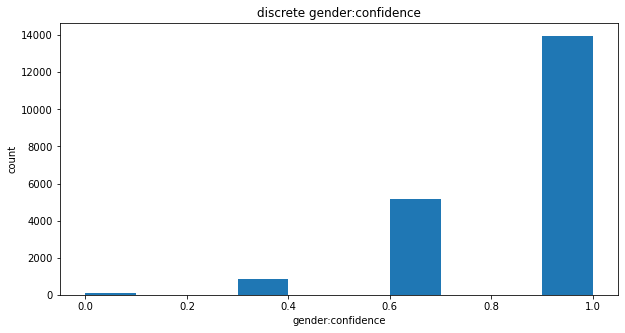

In [33]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

df['gender:confidence'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("gender:confidence")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete gender:confidence")

In [34]:
discrete_gender_confidence = np.linspace(min(df["gender:confidence"]), max(df["gender:confidence"]), 10)
discrete_gender_confidence

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [35]:
gender_confidence_levels = ['gender:confidence_1','gender:confidence_2','gender:confidence_3','gender:confidence_4','gender:confidence_5','gender:confidence_6','gender:confidence_7','gender:confidence_8','gender:confidence_9']

In [36]:
df['discrete-gender:confidence'] = pd.cut(df['gender:confidence'], discrete_gender_confidence, labels=gender_confidence_levels, include_lowest=True)

In [37]:
df[['gender:confidence','discrete-gender:confidence']].head(20)

,gender:confidence,discrete-gender:confidence
0,1.0000,gender:confidence_9
1,1.0000,gender:confidence_9
2,0.6625,gender:confidence_6
3,1.0000,gender:confidence_9
4,1.0000,gender:confidence_9
5,1.0000,gender:confidence_9
6,1.0000,gender:confidence_9
7,1.0000,gender:confidence_9
8,1.0000,gender:confidence_9
9,1.0000,gender:confidence_9


In [38]:
df['gender:confidence'].value_counts()

1.0000    13952
0.0000       71
0.6691       31
0.6709       30
0.6591       30
          ...  
0.6379        1
0.6322        1
0.6911        1
0.6971        1
0.6873        1
Name: gender:confidence, Length: 923, dtype: int64

In [39]:
#As you see above we changed from 923 continues values to 9 discrete values below 
df['discrete-gender:confidence'].value_counts()

gender:confidence_9    13958
gender:confidence_7     2775
gender:confidence_6     2382
gender:confidence_4      832
gender:confidence_1       71
gender:confidence_3       24
gender:confidence_8        7
gender:confidence_5        1
gender:confidence_2        0
Name: discrete-gender:confidence, dtype: int64

###### 2. Making profile_yn:confidence discrete

In [40]:
df[['profile_yn:confidence']]

,profile_yn:confidence
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
20045,1.0
20046,1.0
20047,1.0
20048,1.0


In [41]:
df['profile_yn:confidence'].value_counts()

1.0000    19642
0.6649        6
0.6557        6
0.6671        4
0.6436        4
          ...  
0.6567        1
0.6516        1
0.6816        1
0.6506        1
0.6913        1
Name: profile_yn:confidence, Length: 267, dtype: int64

Text(0.5, 1.0, 'discrete profile_yn:confidence')

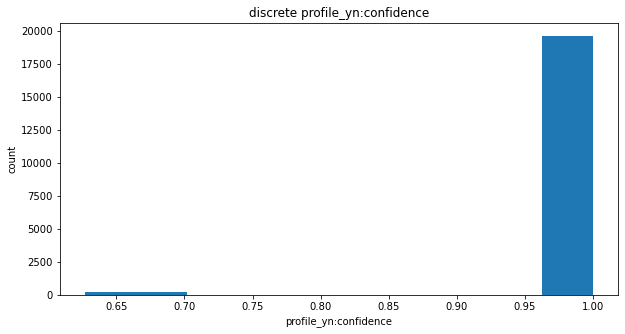

In [42]:
df['profile_yn:confidence'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("profile_yn:confidence")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete profile_yn:confidence")

In [43]:
discrete_profile_yn_confidence = np.linspace(min(df["profile_yn:confidence"]), max(df["profile_yn:confidence"]), 10)
discrete_profile_yn_confidence

array([0.6272    , 0.66862222, 0.71004444, 0.75146667, 0.79288889,
       0.83431111, 0.87573333, 0.91715556, 0.95857778, 1.        ])

In [44]:
profile_yn_confidence_levels = ['profile_yn_confidence_1','profile_yn_confidence_2','profile_yn_confidence_3','profile_yn_confidence_4','profile_yn_confidence_5','profile_yn_confidence_6','profile_yn_confidence_7','profile_yn_confidence_8','profile_yn_confidence_9']

In [45]:
df['discrete-profile_yn_confidence'] = pd.cut(df['profile_yn:confidence'], discrete_profile_yn_confidence, labels=profile_yn_confidence_levels, include_lowest=True)

In [46]:
df[['profile_yn:confidence','discrete-profile_yn_confidence']]

,profile_yn:confidence,discrete-profile_yn_confidence
0,1.0,profile_yn_confidence_9
1,1.0,profile_yn_confidence_9
2,1.0,profile_yn_confidence_9
3,1.0,profile_yn_confidence_9
4,1.0,profile_yn_confidence_9
...,...,...
20045,1.0,profile_yn_confidence_9
20046,1.0,profile_yn_confidence_9
20047,1.0,profile_yn_confidence_9
20048,1.0,profile_yn_confidence_9


In [47]:
df['profile_yn:confidence'].value_counts()

1.0000    19642
0.6649        6
0.6557        6
0.6671        4
0.6436        4
          ...  
0.6567        1
0.6516        1
0.6816        1
0.6506        1
0.6913        1
Name: profile_yn:confidence, Length: 267, dtype: int64

In [48]:
#As you see above we changed from 267 continues values to 9 discrete values below 
df['discrete-profile_yn_confidence'].value_counts()

profile_yn_confidence_9    19644
profile_yn_confidence_1      244
profile_yn_confidence_2      162
profile_yn_confidence_8        0
profile_yn_confidence_7        0
profile_yn_confidence_6        0
profile_yn_confidence_5        0
profile_yn_confidence_4        0
profile_yn_confidence_3        0
Name: discrete-profile_yn_confidence, dtype: int64

###### 3. Making fav_number discrete

In [49]:
df[['fav_number']]

,fav_number
0,0
1,68
2,7696
3,202
4,37318
...,...
20045,302
20046,2513
20047,50
20048,70804


In [50]:
df['fav_number'].value_counts()

0        3334
1         395
2         254
3         193
5         162
         ... 
4380        1
4442        1
12638       1
2319        1
4006        1
Name: fav_number, Length: 6784, dtype: int64

Text(0.5, 1.0, 'discrete fav_number')

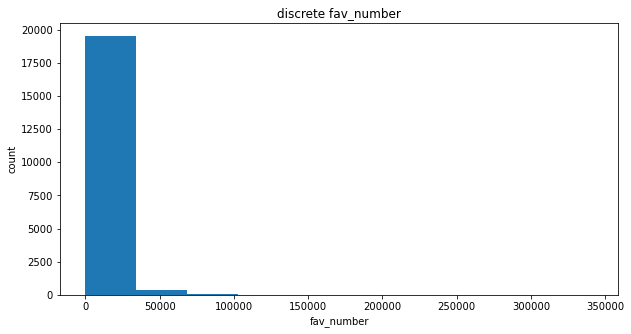

In [51]:
df['fav_number'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("fav_number")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete fav_number")

In [52]:
discrete_fav_number = np.linspace(min(df["fav_number"]), max(df["fav_number"]), 10)
discrete_fav_number

array([     0.        ,  37957.88888889,  75915.77777778, 113873.66666667,
       151831.55555556, 189789.44444444, 227747.33333333, 265705.22222222,
       303663.11111111, 341621.        ])

In [53]:
fav_number_levels = ['fav_number_1','fav_number_2','fav_number_3','fav_number_4','fav_number_5','fav_number_6','fav_number_7','fav_number_8','fav_number_9']

In [54]:
df['discrete-fav_number'] = pd.cut(df['fav_number'], discrete_fav_number, labels=fav_number_levels, include_lowest=True)

In [55]:
df[['fav_number','discrete-fav_number']]

,fav_number,discrete-fav_number
0,0,fav_number_1
1,68,fav_number_1
2,7696,fav_number_1
3,202,fav_number_1
4,37318,fav_number_1
...,...,...
20045,302,fav_number_1
20046,2513,fav_number_1
20047,50,fav_number_1
20048,70804,fav_number_2


In [56]:
df['fav_number'].value_counts()

0        3334
1         395
2         254
3         193
5         162
         ... 
4380        1
4442        1
12638       1
2319        1
4006        1
Name: fav_number, Length: 6784, dtype: int64

In [57]:
#As you see above we changed from 6784 continues values to 9 discrete values below 
df['discrete-fav_number'].value_counts()

fav_number_1    19600
fav_number_2      338
fav_number_3       73
fav_number_4       22
fav_number_6        6
fav_number_5        6
fav_number_7        3
fav_number_9        1
fav_number_8        1
Name: discrete-fav_number, dtype: int64

###### 4. Making tweet_count discrete

In [58]:
df[['tweet_count']]

,tweet_count
0,110964
1,7471
2,5617
3,1693
4,31462
...,...
20045,783
20046,13523
20047,26419
20048,56073


In [59]:
df['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
           ..
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

Text(0.5, 1.0, 'discrete tweet_count')

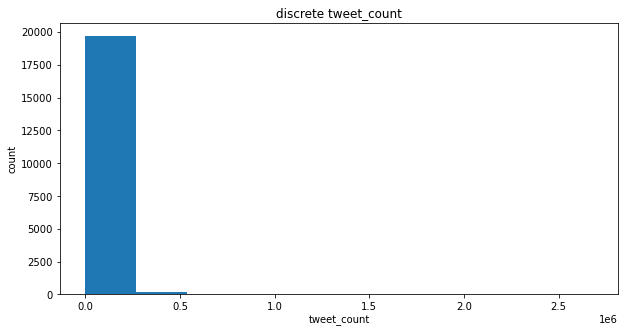

In [60]:
df['tweet_count'].plot(kind='hist', figsize=(10, 5))
plt.pyplot.xlabel("tweet_count")
plt.pyplot.ylabel("count")
plt.pyplot.title("discrete tweet_count")

In [61]:
discrete_tweet_count = np.linspace(min(df["tweet_count"]), max(df["tweet_count"]), 10)
discrete_tweet_count

array([1.00000000e+00, 2.97800778e+05, 5.95600556e+05, 8.93400333e+05,
       1.19120011e+06, 1.48899989e+06, 1.78679967e+06, 2.08459944e+06,
       2.38239922e+06, 2.68019900e+06])

In [62]:
tweet_count_levels = ['tweet_count_1','tweet_count_2','tweet_count_3','tweet_count_4','tweet_count_5','tweet_count_6','tweet_count_7','tweet_count_8','tweet_count_9']

In [63]:
df['discrete-tweet_count'] = pd.cut(df['tweet_count'], discrete_tweet_count, labels=tweet_count_levels, include_lowest=True)

In [64]:
df[['tweet_count','discrete-tweet_count']]

,tweet_count,discrete-tweet_count
0,110964,tweet_count_1
1,7471,tweet_count_1
2,5617,tweet_count_1
3,1693,tweet_count_1
4,31462,tweet_count_1
...,...,...
20045,783,tweet_count_1
20046,13523,tweet_count_1
20047,26419,tweet_count_1
20048,56073,tweet_count_1


In [65]:
df['tweet_count'].value_counts()

151386     30
1          26
2372591    24
3          24
2          21
           ..
57126       1
15103       1
13054       1
4858        1
100353      1
Name: tweet_count, Length: 14280, dtype: int64

In [66]:
#As you see above we changed from 14280 continues values to 9 discrete values below 
df['discrete-tweet_count'].value_counts()

tweet_count_1    19766
tweet_count_2      181
tweet_count_3       38
tweet_count_4       27
tweet_count_8       24
tweet_count_5       10
tweet_count_6        2
tweet_count_9        1
tweet_count_7        1
Name: discrete-tweet_count, dtype: int64

In [67]:
df


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,discrete-gender:confidence,discrete-profile_yn_confidence,discrete-fav_number,discrete-tweet_count
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,"[40.798598, -73.971836]",110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,"[40.798598, -73.971836]",7471,10/26/15 12:40,6.587300e+17,London,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,"[40.798598, -73.971836]",5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,gender:confidence_6,profile_yn_confidence_9,fav_number_1,tweet_count_1
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,"[40.798598, -73.971836]",1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,"[40.798598, -73.971836]",31462,10/26/15 12:40,6.587300e+17,London,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,10/26/15 23:05,female,1.0000,yes,1.0,8/5/15 21:16,...,"[40.798598, -73.971836]",783,10/26/15 13:20,6.587400e+17,Verona ªÁ,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
20046,815757681,True,golden,248,10/26/15 23:05,male,1.0000,yes,1.0,8/15/12 21:17,...,"[40.798598, -73.971836]",13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
20047,815757830,True,golden,264,10/26/15 23:05,male,1.0000,yes,1.0,9/3/12 1:17,...,"[40.798598, -73.971836]",26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,Eastern Time (US & Canada),gender:confidence_9,profile_yn_confidence_9,fav_number_1,tweet_count_1
20048,815757921,True,golden,250,10/26/15 23:05,female,0.8489,yes,1.0,11/6/12 23:46,...,"[40.798598, -73.971836]",56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,Eastern Time (US & Canada),gender:confidence_8,profile_yn_confidence_9,fav_number_2,tweet_count_1


In [68]:
df.to_csv(r'data.csv')